,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Valores ausentes:
nome                  16
host_name             21
ultima_review      10052
reviews_por_mes    10052
dtype: int64


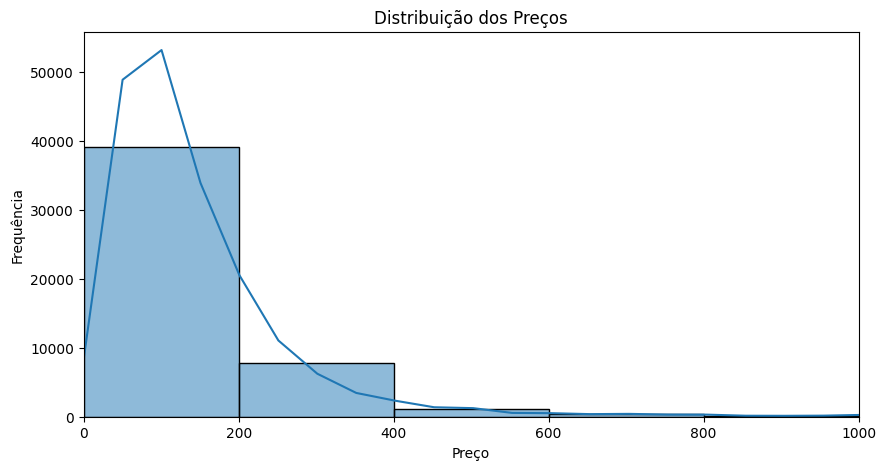

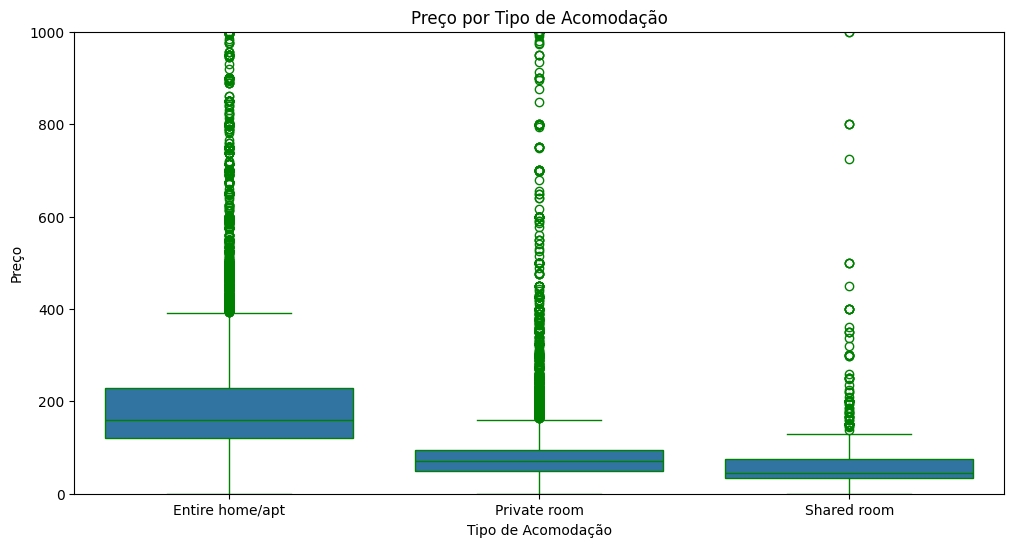

C:\Users\Windows11\AppData\Local\Temp\ipykernel_16784\3494197994.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bairro_prices.index, y=bairro_prices.values, palette="viridis")


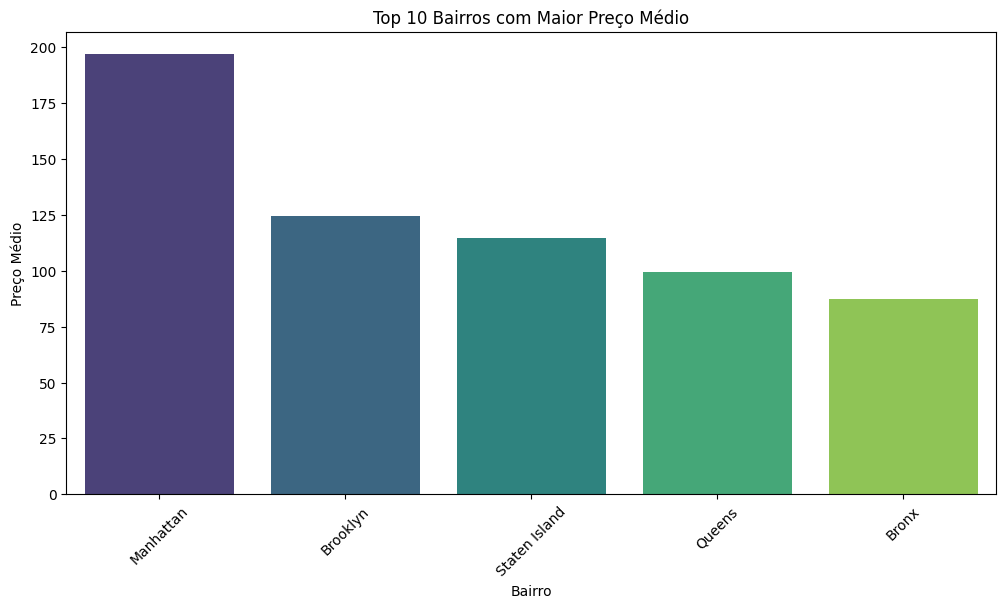

np.float64(301.2681818181818)

In [21]:
# Passo 1: Importar a base de dados 
import pandas as pd
# Importar bibliotecas para fazer a distribuição de preço
import matplotlib.pyplot as plt
import seaborn as sns

# Colocando valor da arquivo csv na variavel indicium 
indicium = "teste_indicium_precificacao.csv"
tabela = pd.read_csv(indicium)

# Visualizar base de dados exibindo as primeiras linhas da tabela
display(tabela.head())

# Descrever as Estatísticas
display(tabela.describe())

# Verificar a ausencia de valores
missing_values = tabela.isnull().sum()
print("Valores ausentes:")
print(missing_values[missing_values > 0])

# Fazer a distribuiçõa de preços usando as bibliotecas matplotlib.pyplot e seaborn
plt.figure(figsize=(10, 5))
sns.histplot(tabela["price"], bins=50, kde=True)
plt.xlim(0, 1000)
plt.title("Distribuição dos Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

# Gráfico de caixa usado para visualizar a distribuição dos preços
plt.figure(figsize=(12, 6))
sns.boxplot(data=tabela, x="room_type", y="price", linecolor='green')
plt.ylim(0, 1000)
plt.title("Preço por Tipo de Acomodação")
plt.xlabel("Tipo de Acomodação")
plt.ylabel("Preço")
plt.show()

# Os 10 grupos de bairros mais caros listados
bairro_prices = tabela.groupby("bairro_group")["price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=bairro_prices.index, y=bairro_prices.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Bairros com Maior Preço Médio")
plt.xlabel("Bairro")
plt.ylabel("Preço Médio")
plt.show()


# Filtrar e ver padrão nos locais mais caros
top_10_percent = tabela[tabela['price'] >= tabela['price'].quantile(0.9)]
from collections import Counter
all_words = ' '.join(top_10_percent['nome'].dropna()).lower().split()
word_freq = Counter(all_words)
word_freq.most_common(10)


# 4 - Filtrar imóveis com características semelhantes para estimar o preço
similar_listings = tabela[(tabela['bairro_group'] == 'Manhattan') &
                      (tabela['bairro'] == 'Midtown') &
                      (tabela['room_type'] == 'Entire home/apt')]

preco_medio = similar_listings['price'].mean()
preco_medio

